In [1]:
cd ../..

/Users/tom/Documents/REPO/guitar-set


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from guitar_set.core import *
import jams
import jams.display
import matplotlib.pyplot as plt
%matplotlib nbagg

In [80]:
filepath = '/Users/tom/Music/DataSet/test-set_processed/jf_Funk3-112-C#_c_hex_cln.wav'
ref_jam = jams.load('/Users/tom/Music/DataSet/test-set_man/jf_Funk3-112-C#_c_man.jams')

# filepath = '/Users/tom/Music/DataSet/test-set_processed/js_SS2-107-Ab_c_hex_cln.wav'
# ref_jam = jams.load('/Users/tom/Music/DataSet/test-set_man/js_SS2-107-Ab_c_man.jams')
ref_jam = pyin.ref_jam_update(ref_jam)
# pyin_jam_new = pyin.ref_jam_update(pyin_jam)

In [59]:
h = HexRecording(filepath)

Loading /Users/tom/Music/DataSet/test-set_processed/jf_Funk3-112-C#_c_hex_cln.wav
length of y: 749700, sr: 22050
length of y: 749700, sr: 22050
length of y: 749700, sr: 22050
length of y: 749700, sr: 22050
length of y: 749700, sr: 22050
length of y: 749700, sr: 22050
finished loading


In [73]:
h.detect_jams_pyin()

jf_Funk3-112-C#_c_hex_cln.wav


In [75]:
h.detect_jams_acf()

max_lag:300 min_lag:66
acf.shape:(300, 1464)
max_lag:225 min_lag:50
acf.shape:(225, 1464)
max_lag:168 min_lag:37
acf.shape:(168, 1464)
max_lag:126 min_lag:28
acf.shape:(126, 1465)
max_lag:100 min_lag:22
acf.shape:(100, 1465)
max_lag:75 min_lag:16
acf.shape:(75, 1465)
voicing threshold: at 70%, or amplitude: 0.00487449532375


<IPython.core.display.Javascript object>


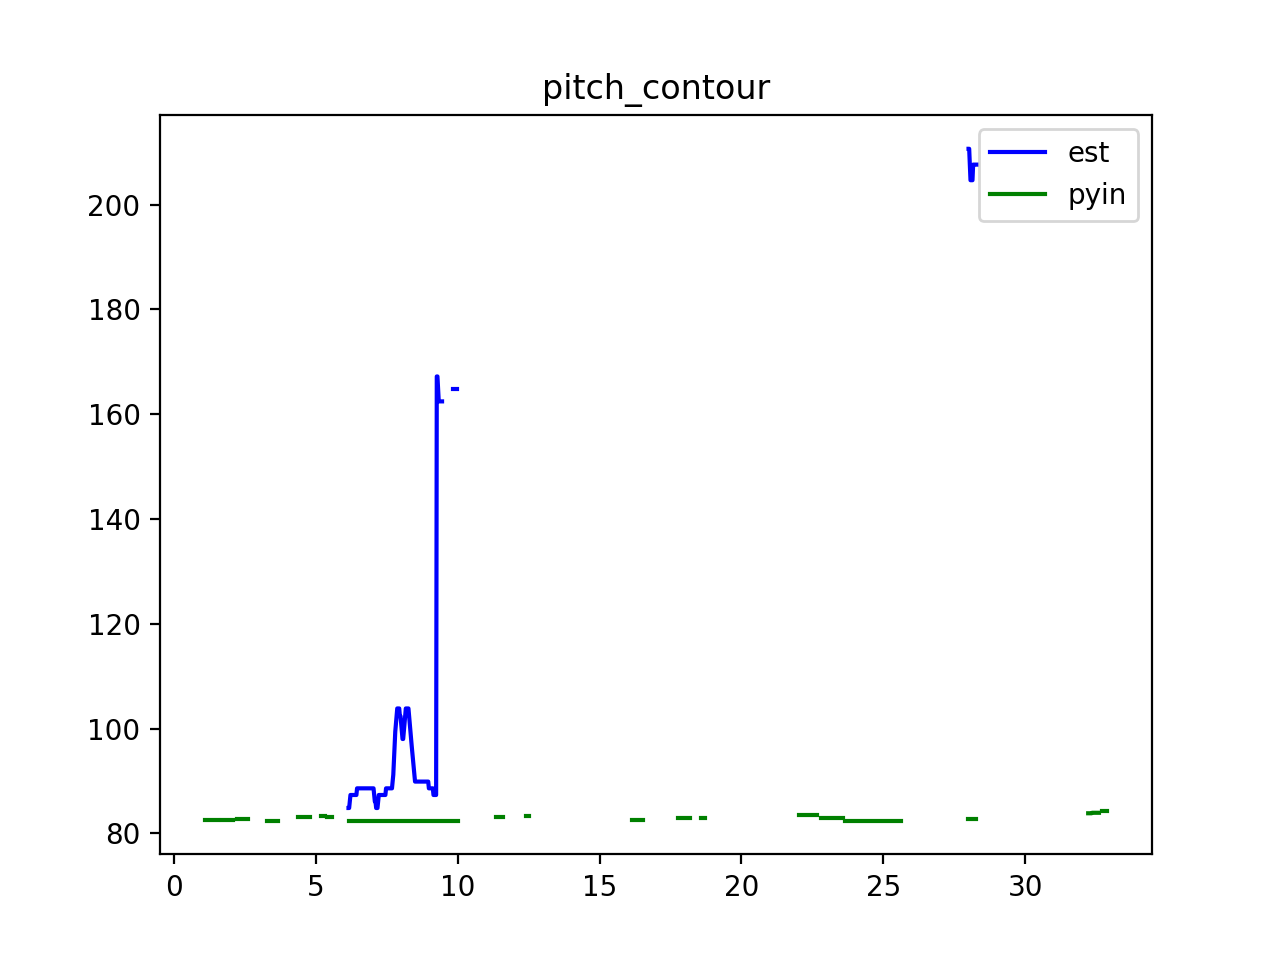

<IPython.core.display.Javascript object>


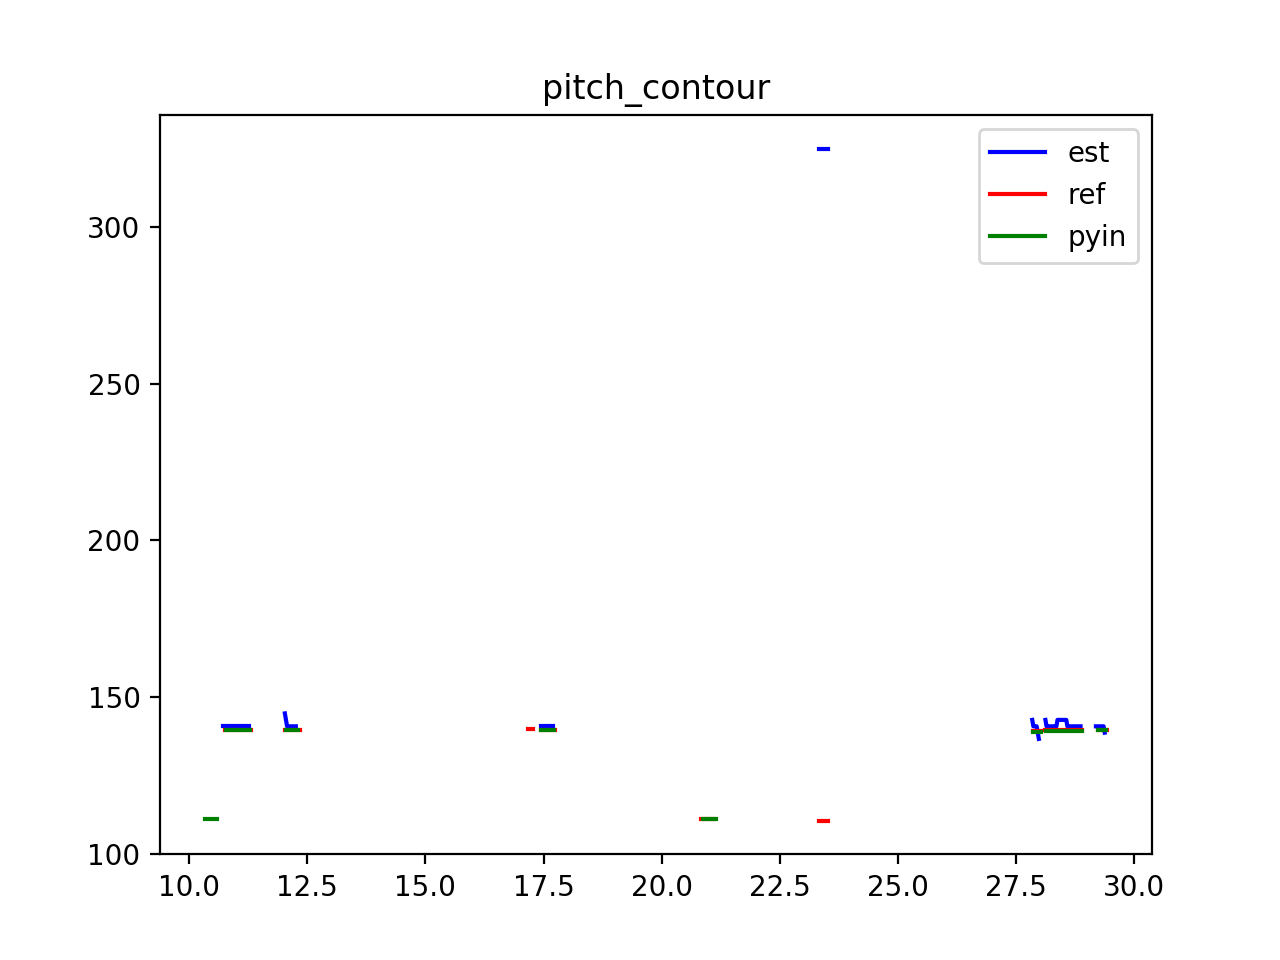

<IPython.core.display.Javascript object>


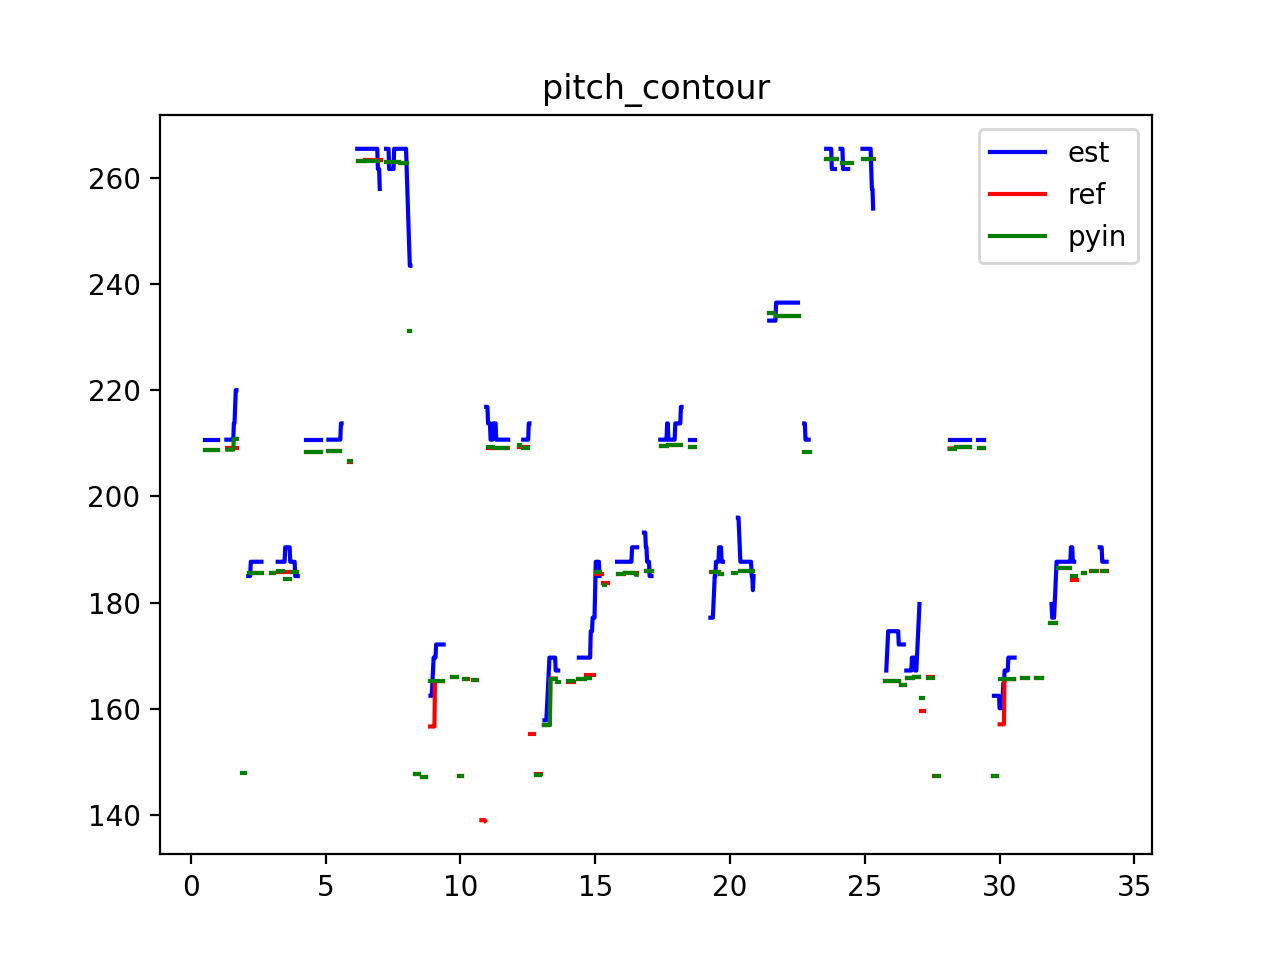

<IPython.core.display.Javascript object>


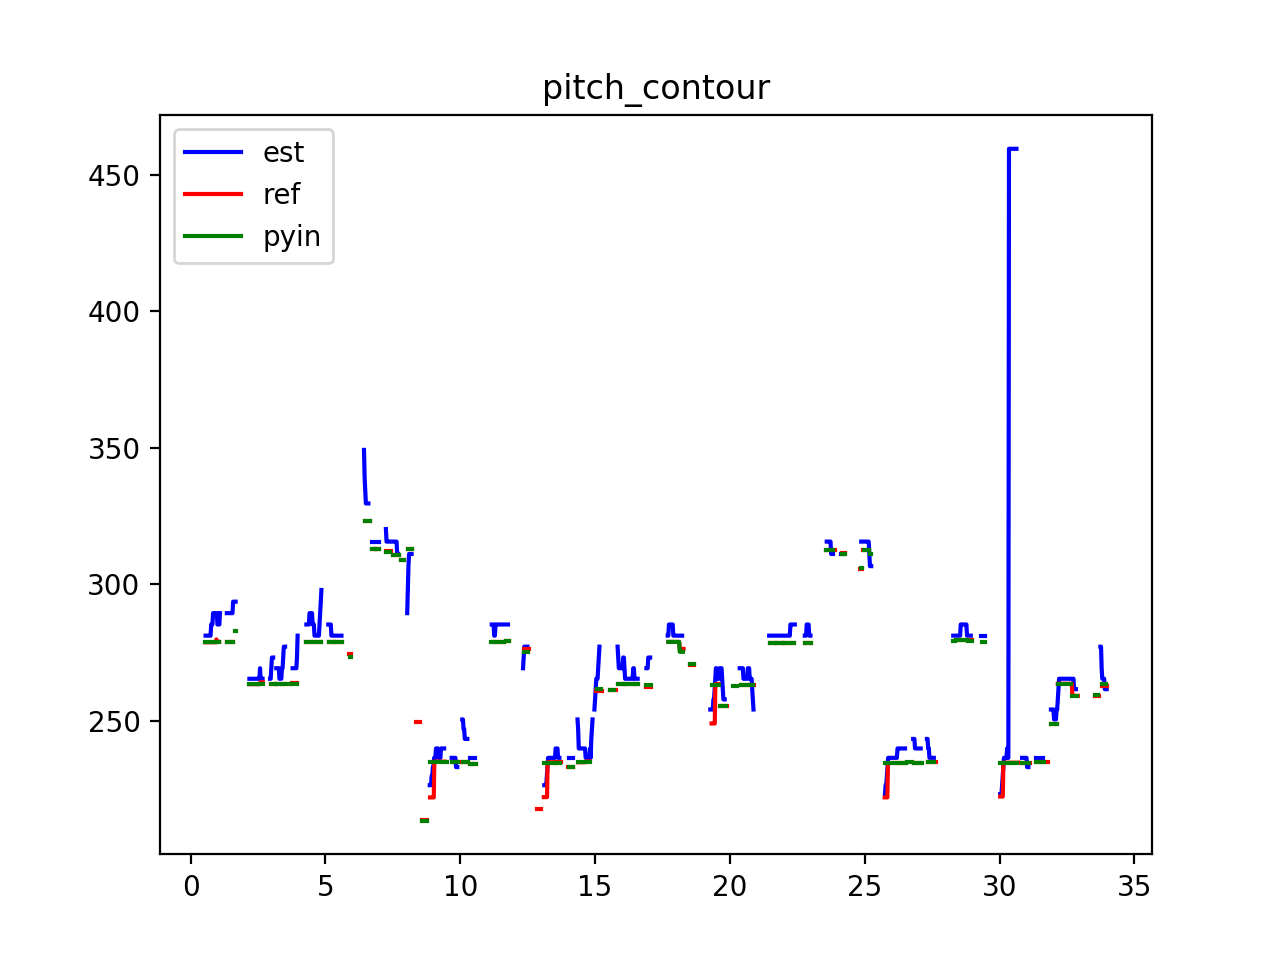

<IPython.core.display.Javascript object>


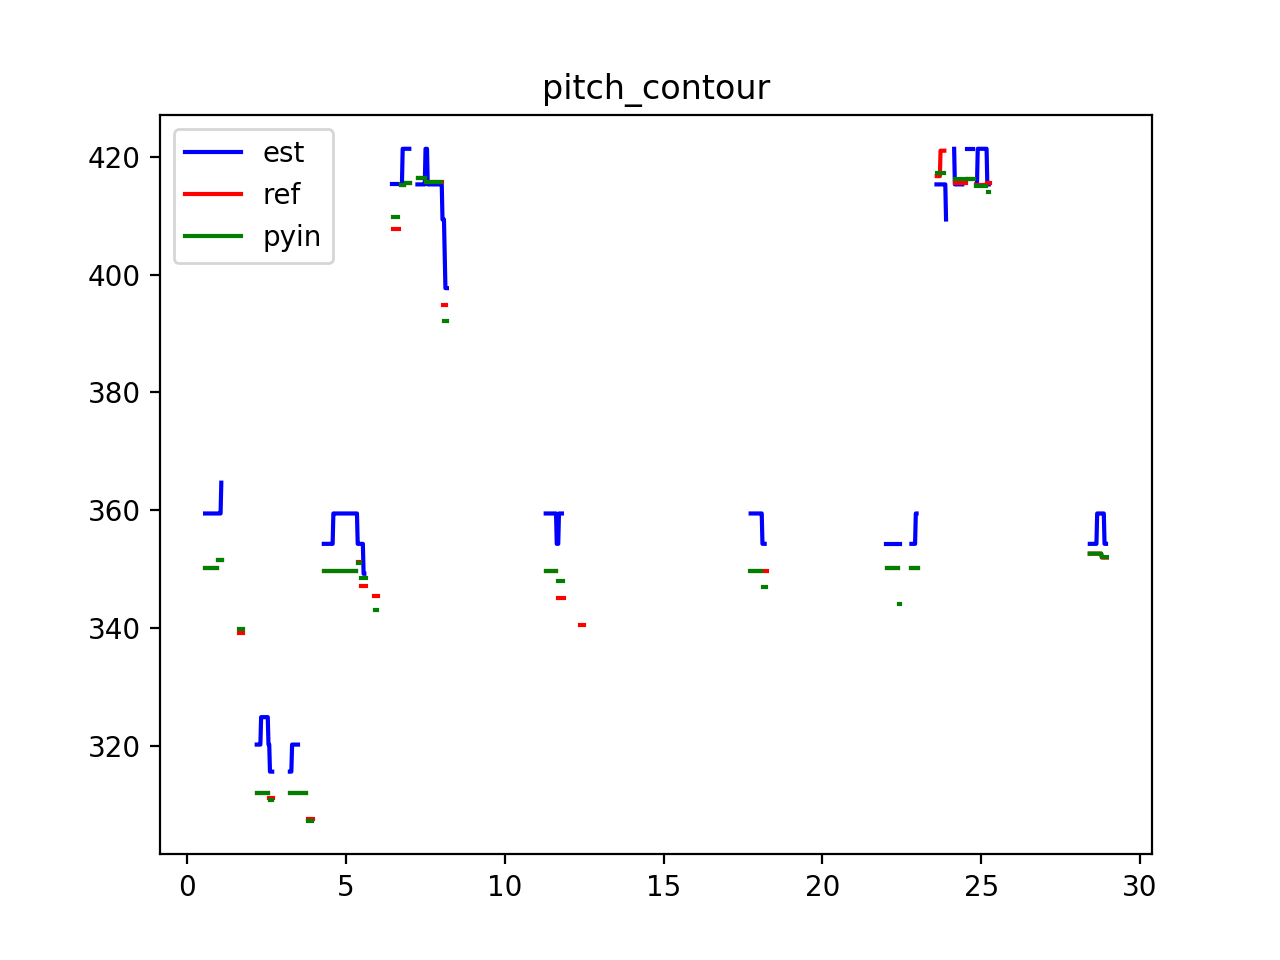

<IPython.core.display.Javascript object>


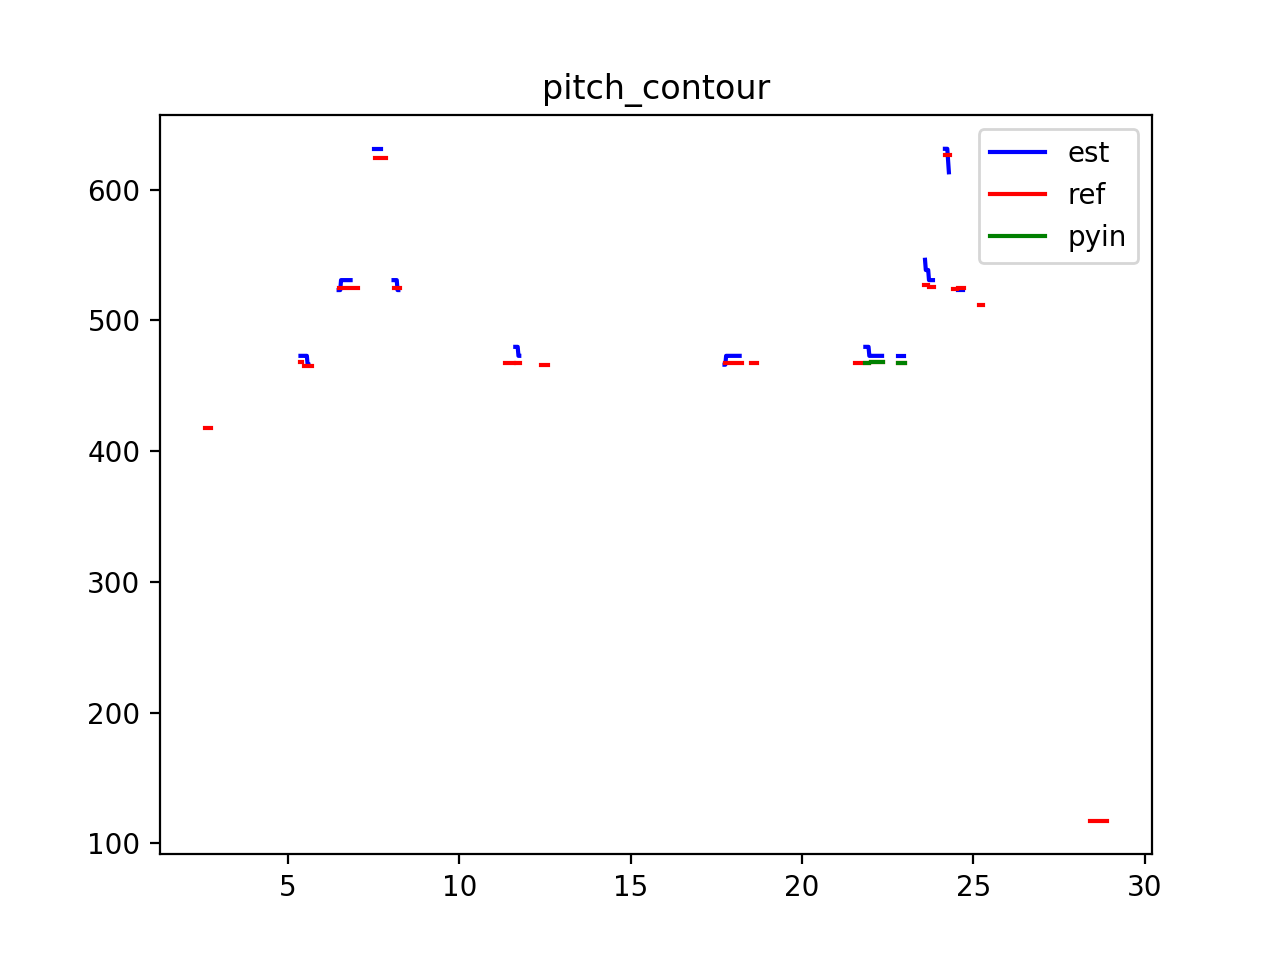

In [104]:
for str_num in range(6):
    anno_acf = h.jam_acf.annotations[str_num]
    anno_ref = ref_jam.annotations[str_num]
    anno_pyin = h.jam_pyin.annotations[str_num]
    plt.figure()
    jams.display.display(anno_acf, color='b', label='est', meta=False)
    jams.display.display(anno_ref, color='r', label='ref', meta=False)
    jams.display.display(anno_pyin, color='g', label='pyin', meta=False)
    plt.legend()
    plt.show()

In [100]:
jams.eval.melody(est=anno_pyin, ref=anno_ref)

OrderedDict([('Voicing Recall', 0.93961352657004826),
             ('Voicing False Alarm', 0.0031104199066874028),
             ('Raw Pitch Accuracy', 0.93961352657004826),
             ('Raw Chroma Accuracy', 0.94444444444444442),
             ('Overall Accuracy', 0.98294117647058821)])

In [101]:
jams.eval.melody(est=anno_acf, ref=anno_ref)

OrderedDict([('Voicing Recall', 0.84057971014492749),
             ('Voicing False Alarm', 0.013996889580093312),
             ('Raw Pitch Accuracy', 0.7874396135265701),
             ('Raw Chroma Accuracy', 0.81642512077294682),
             ('Overall Accuracy', 0.93764705882352939)])

In [102]:
from IPython.display import Audio

data = jams.sonify.pitch_contour(anno_pyin)
Audio(data=data, rate=22050)

<IPython.core.display.Javascript object>


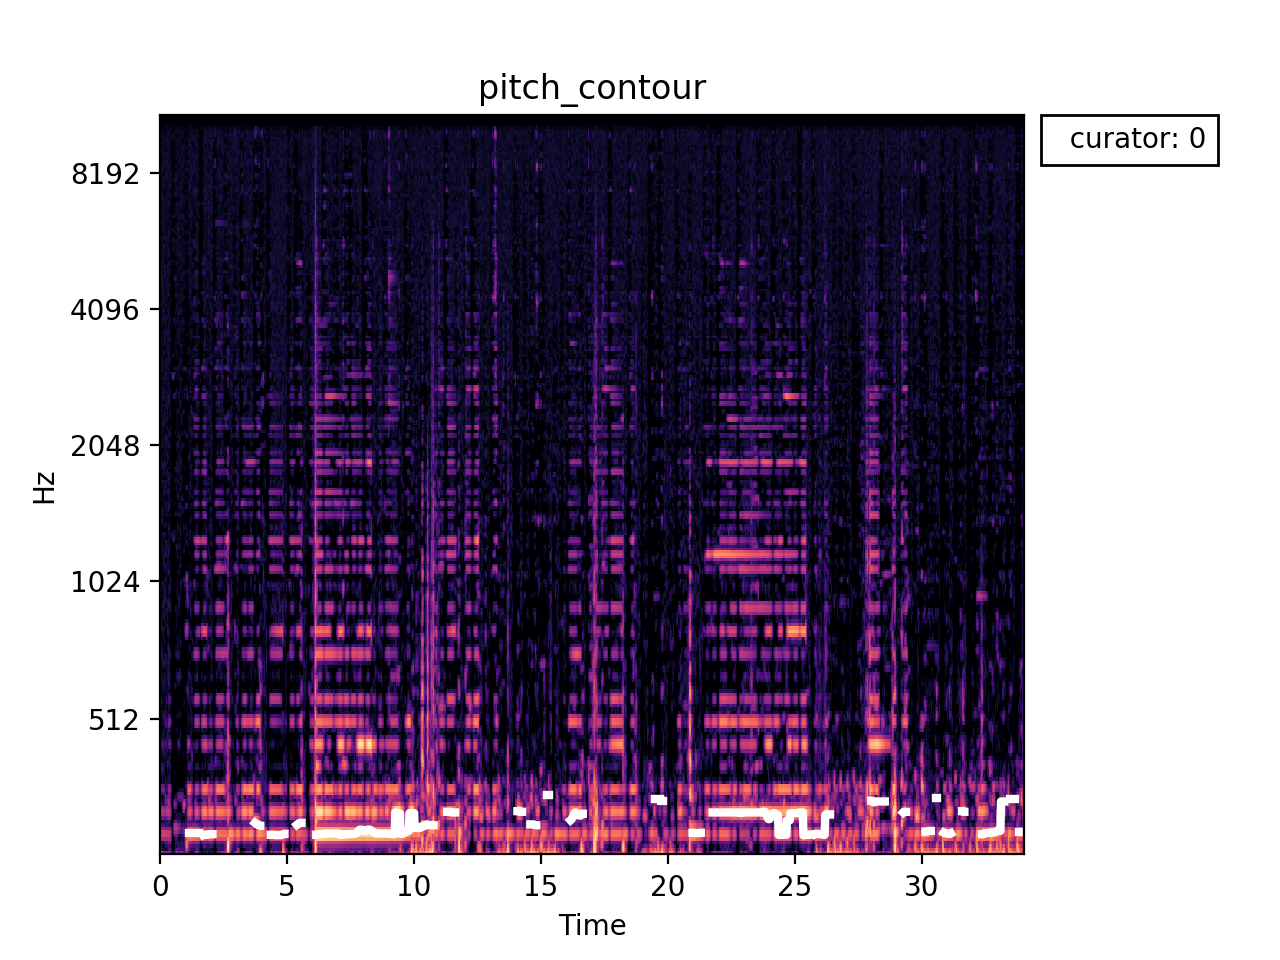

<IPython.core.display.Javascript object>


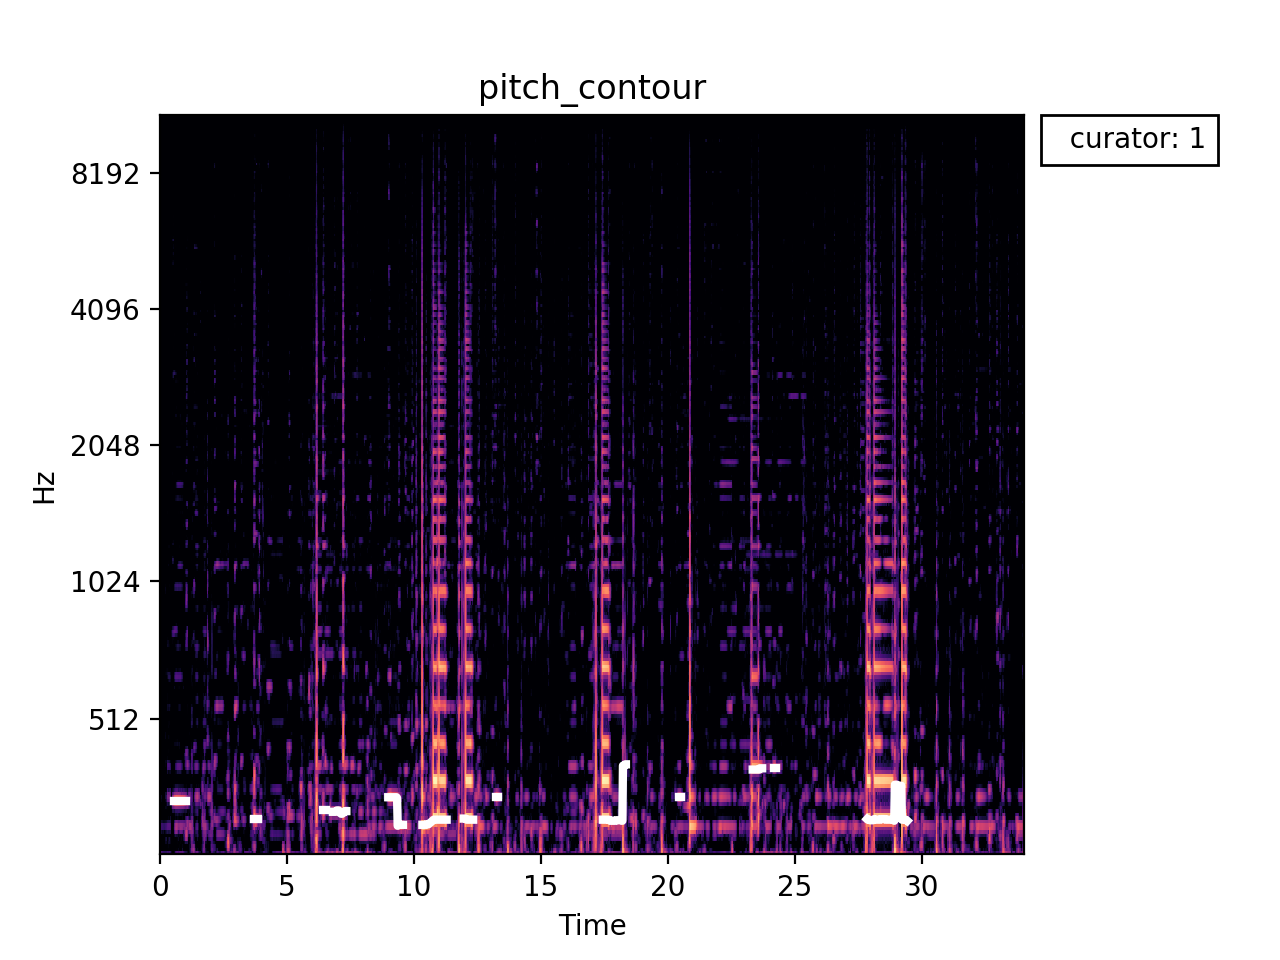

<IPython.core.display.Javascript object>


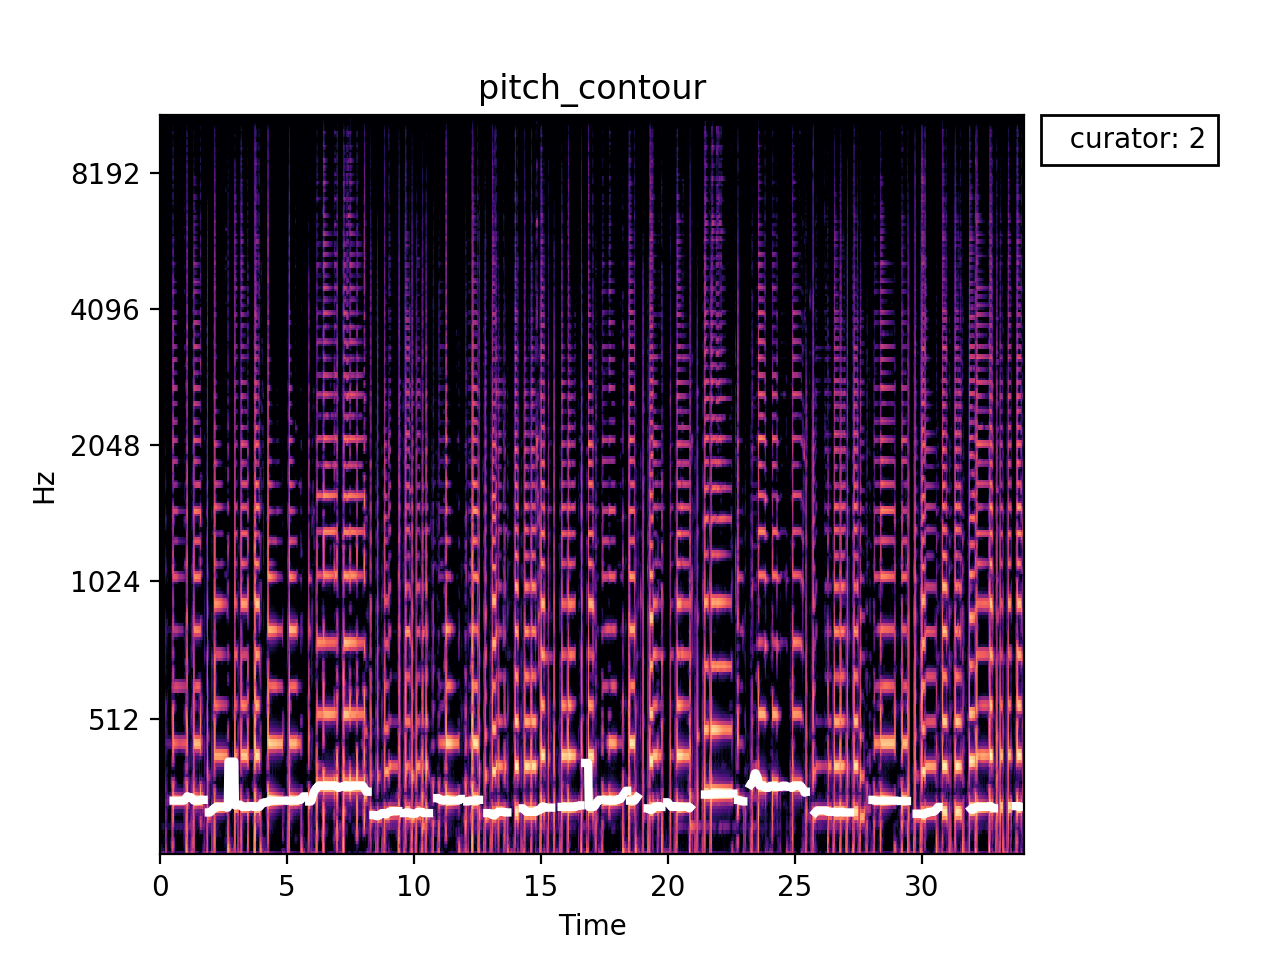

<IPython.core.display.Javascript object>


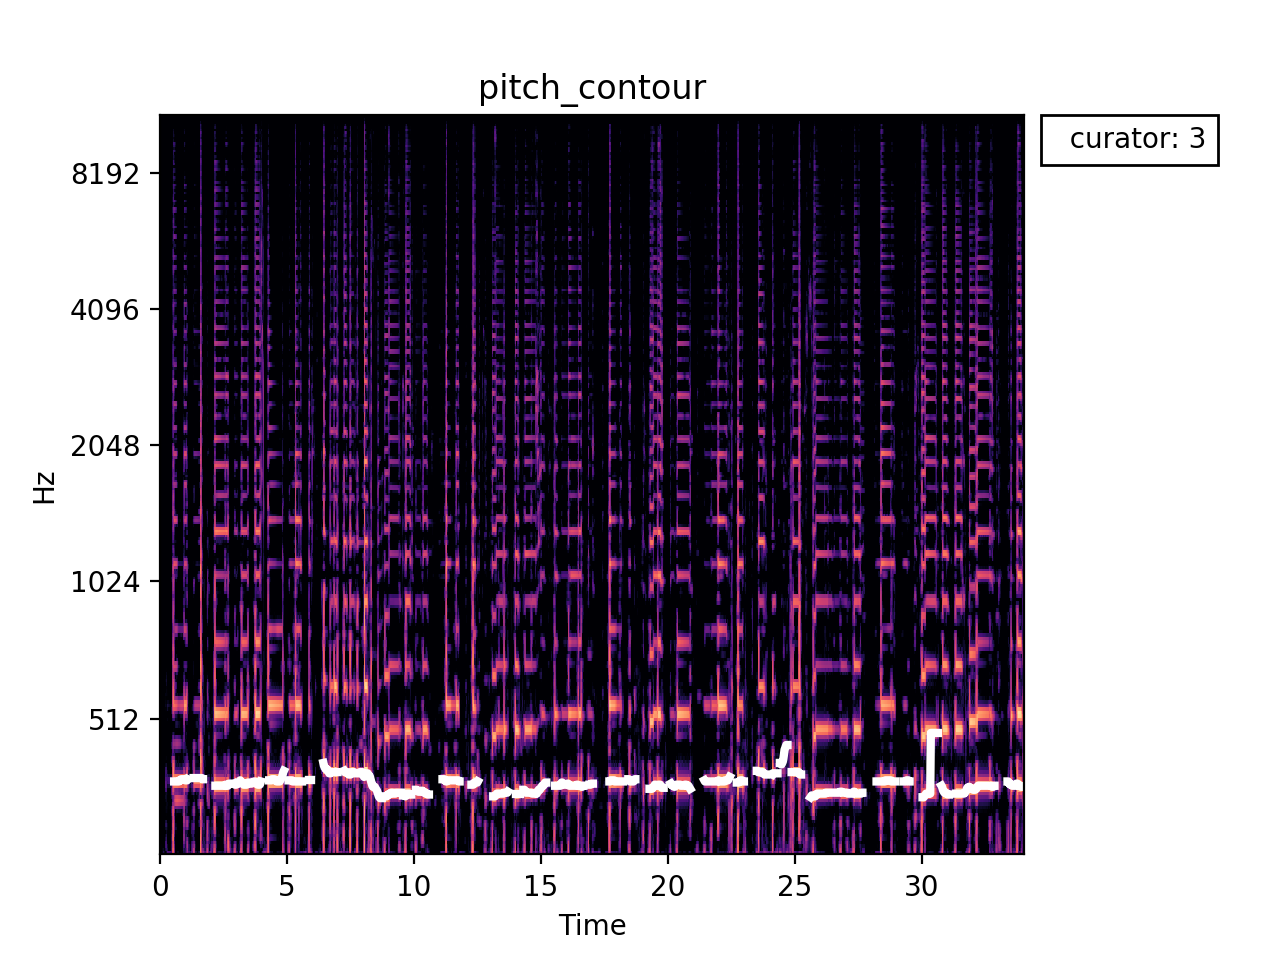

<IPython.core.display.Javascript object>


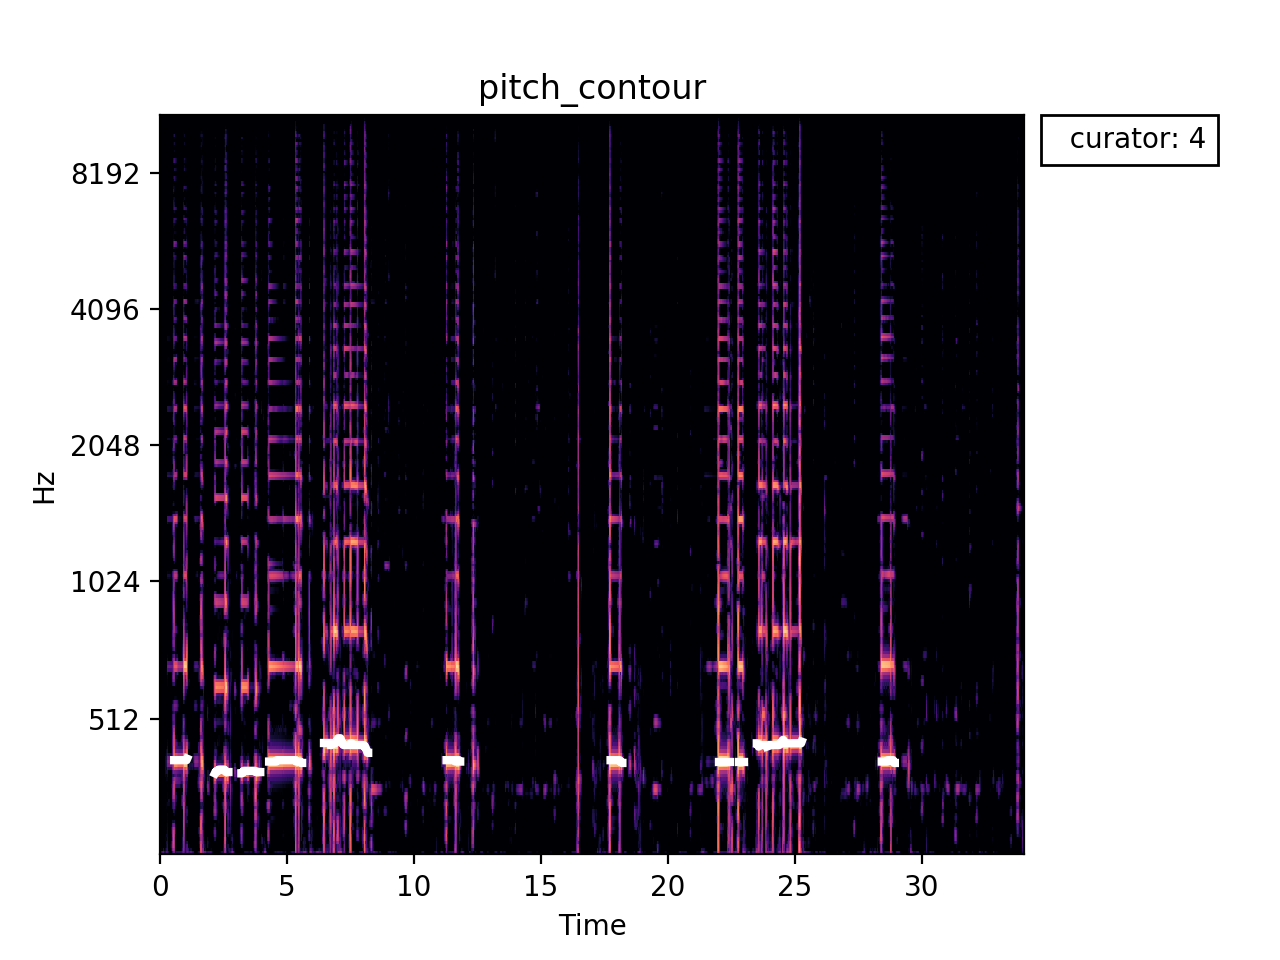

<IPython.core.display.Javascript object>


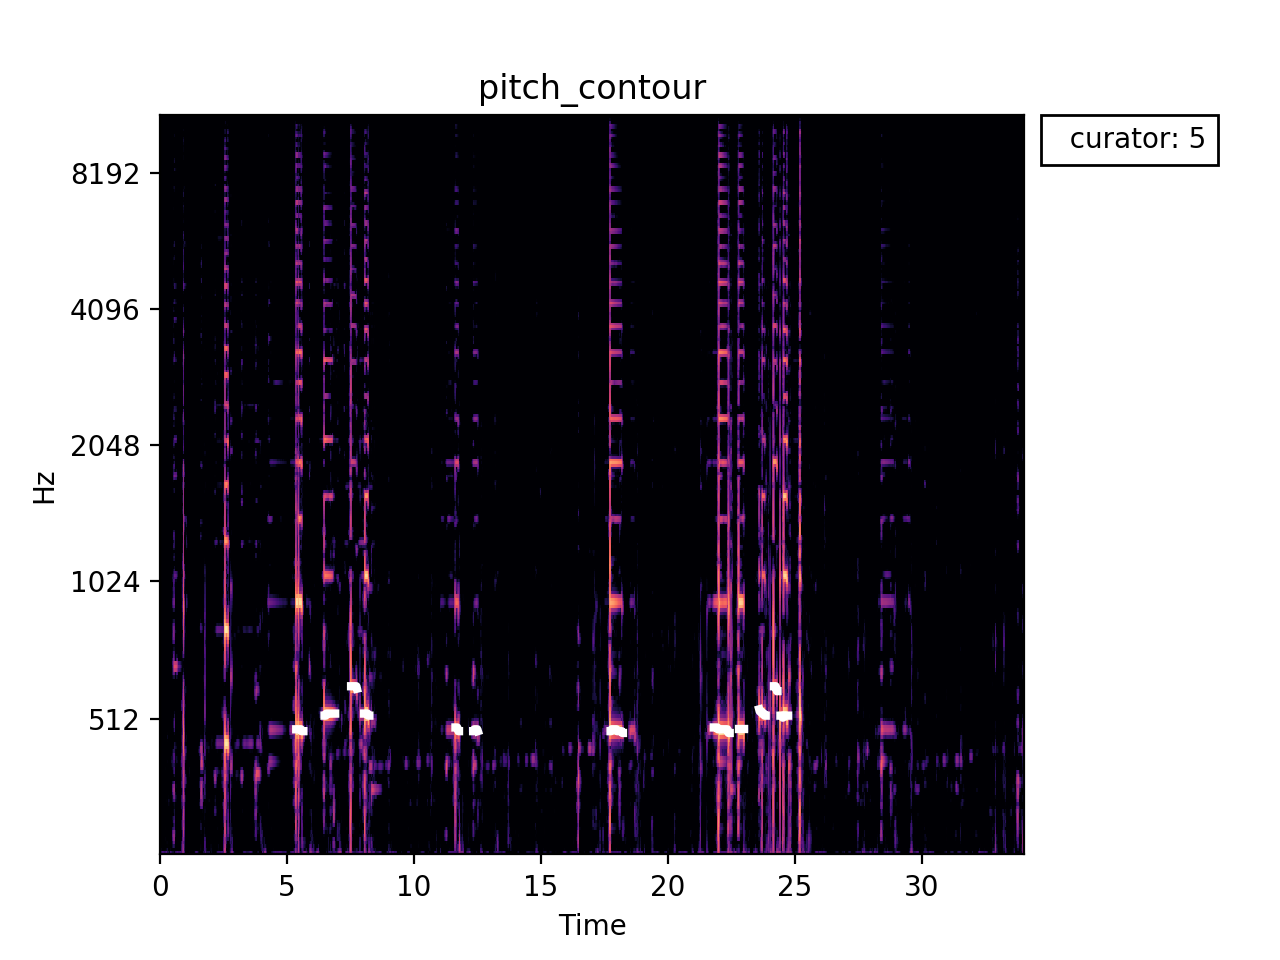

In [49]:
h.visualize_f0s()